In [ ]:
import numpy as np
import tensorflow as tf
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
!git clone https://github.com/Tuong2307/DogBreed5

fatal: destination path 'DogBreed5' already exists and is not an empty directory.


In [ ]:
# Define the path to the data
train_data_dir = "/content/DogBreed5/DogBreedIden/DogBreed/Train"
test_data_dir = "/content/DogBreed5/DogBreedIden/DogBreed/Test"

# Define the fruit categories
categories = ["Basset", "Chihuahua", "Chow_dog", "Cocker_spaniel_dog",  "Dalmatian", "Husky",  "Labrador_dog", "Maltese_dog",  "Pakinese_dog", "Papillon", "Pug","Shiba Inu", "Shih Tzu"]
# Initialize dictionaries to track the size of each category
train_category_sizes = {category: 0 for category in categories}
test_category_sizes = {category: 0 for category in categories}

# Function to load and process images
def load_images(data_dir, category_sizes):
    x_data = []
    y_data = []
    for category in categories:
        category_path = os.path.join(data_dir, category)
        for img in os.listdir(category_path):
            try:
                img_path = os.path.join(category_path, img)
                img = Image.open(img_path).resize((128, 128))
                img_array = np.array(img)
                x_data.append(img_array)
                y_data.append(categories.index(category))
                category_sizes[category] += 1
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(x_data), np.array(y_data)

# Load and process training data
x_train, y_train = load_images(train_data_dir, train_category_sizes)
x_train = x_train.astype('float32') / 255  # Scale pixel values to the range [0, 1]

# Load and process test data
x_test, y_test = load_images(test_data_dir, test_category_sizes)
x_test = x_test.astype('float32') / 255  # Scale pixel values to the range [0, 1]

In [ ]:
print(y_train[1000])

1


In [ ]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Tạo data augmentation generator
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Áp dụng data augmentation generator vào dữ liệu huấn luyện
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
model = tf.keras.models.Sequential([
    Conv2D(64, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Dropout(0.2),  # Increased dropout rate

    Flatten(),

    Dense(256, activation="relu"),

    Dropout(0.1),  # Additional dropout layer

    Dense(len (categories), activation="softmax")
])



In [ ]:
from tensorflow.keras.optimizers import Adam

# Tăng learning rate
learning_rate = 0.001  # Thay đổi giá trị này tùy thuộc vào mức độ tăng bạn muốn
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=100,  # Increase the number of epochs
                    validation_data=(x_test, y_test))


Epoch 1/100
264/264 [==============================] - 51s 163ms/step - loss: 2.4114 - accuracy: 0.1456 - val_loss: 2.2102 - val_accuracy: 0.2236
Epoch 2/100
264/264 [==============================] - 42s 160ms/step - loss: 2.1386 - accuracy: 0.2521 - val_loss: 2.0034 - val_accuracy: 0.3137
Epoch 3/100
264/264 [==============================] - 40s 150ms/step - loss: 1.9393 - accuracy: 0.3287 - val_loss: 1.9572 - val_accuracy: 0.3720
Epoch 4/100
264/264 [==============================] - 40s 153ms/step - loss: 1.7953 - accuracy: 0.3800 - val_loss: 1.8019 - val_accuracy: 0.4058
Epoch 5/100
264/264 [==============================] - 39s 149ms/step - loss: 1.7042 - accuracy: 0.4062 - val_loss: 1.7912 - val_accuracy: 0.4128
Epoch 6/100
264/264 [==============================] - 41s 154ms/step - loss: 1.6054 - accuracy: 0.4549 - val_loss: 1.6799 - val_accuracy: 0.4768
Epoch 7/100
264/264 [==============================] - 40s 150ms/step - loss: 1.5397 - accuracy: 0.4789 - val_loss: 1.5921 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 256)       0

In [ ]:
# prompt: save model

model.save('model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# prompt: down model
from google.colab import files
files.download('model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

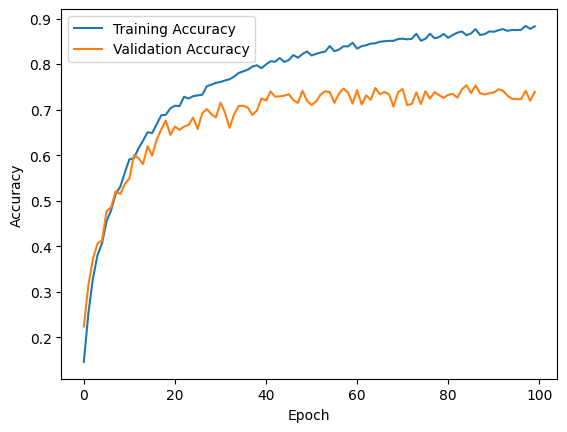

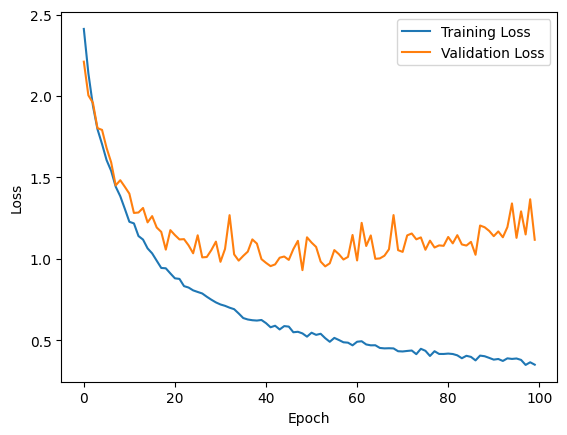

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

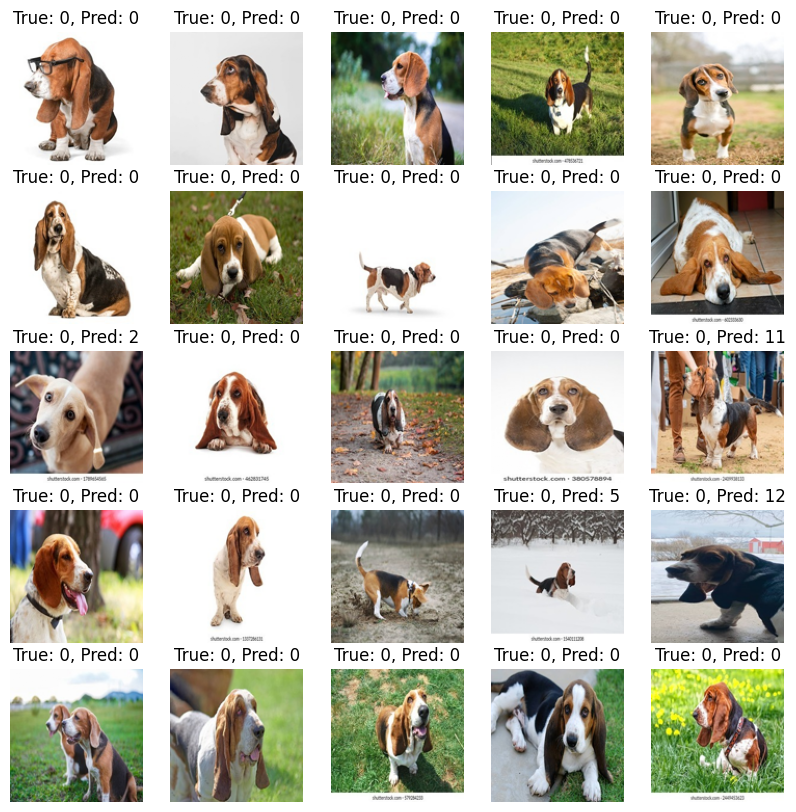

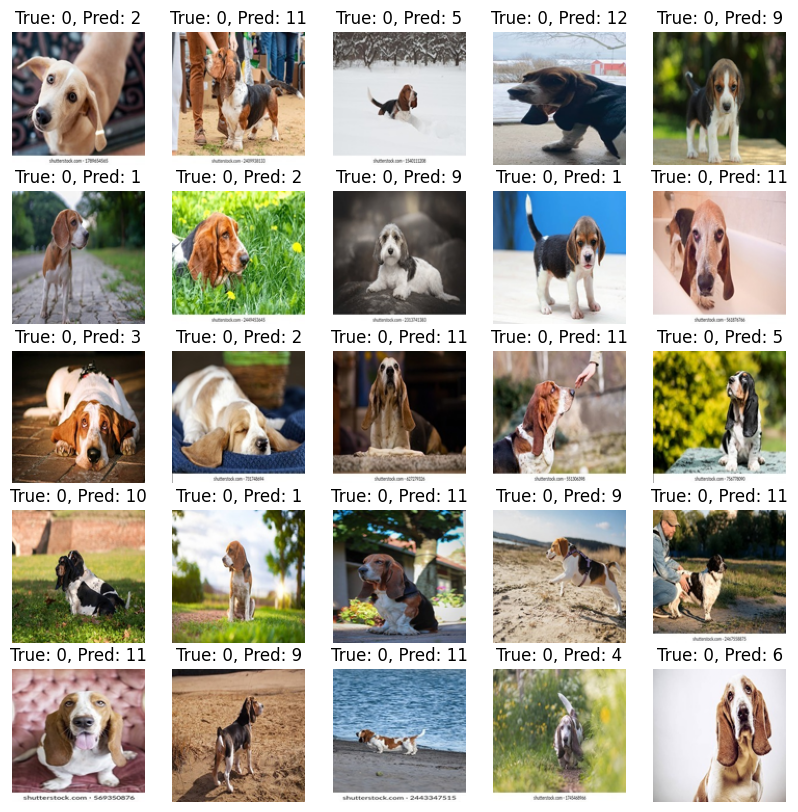

In [ ]:
# prompt: plot dự đoán đúng sai

# Plot the first 25 correct predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"True: {y_test[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

# Plot the first 25 incorrect predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    incorrect_idx = incorrect_indices[i]
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[incorrect_idx])
    plt.title(f"True: {y_test[incorrect_idx]}, Pred: {predicted_labels[incorrect_idx]}")
    plt.axis('off')
plt.show()


113/113 [==============================] - 1s 12ms/step


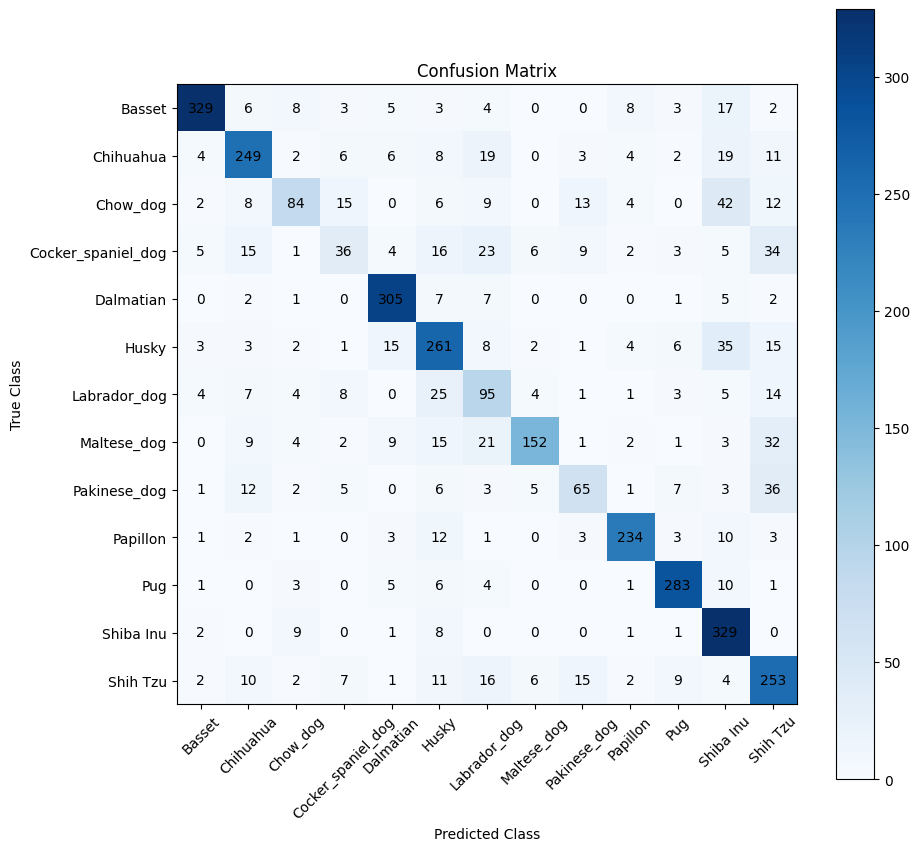

In [ ]:
# prompt: plot confusion matrix

from sklearn.metrics import confusion_matrix

# Predict the labels for the test data
y_pred = model.predict(x_test)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(cm, cmap="Blues")
plt.colorbar()

# Add labels and title
for i in range(len(categories)):
    for j in range(len(categories)):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.xticks(range(len(categories)), categories, rotation=45)
plt.yticks(range(len(categories)), categories)
plt.show()
